# Importing Libraries

## Standard Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Sklearn Libraries 

In [2]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder , LabelEncoder , MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay , f1_score ,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Loading the DataSet

In [3]:
df=pd.read_csv('train1.csv')
# df=df.drop(df.columns[0], axis=1)
# df.head()

In [4]:
# num=df.select_dtypes(include=np.number).columns.tolist()
cat=df.select_dtypes(include=np.object_).columns.tolist()
# df.select_dtypes(include=np.object_).columns.tolist()

## Before Manipulation

<AxesSubplot: xlabel='offer_accepted', ylabel='count'>

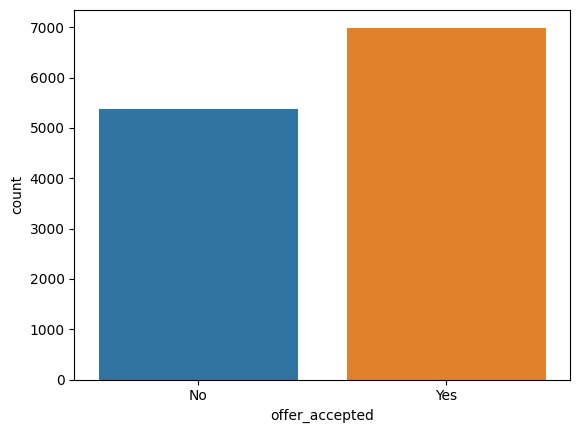

In [5]:
sns.countplot(x=df['offer_accepted'])

# Applying Transformation

In [6]:
categorical_transformer = Pipeline(
    steps=[(
    "encoder",OrdinalEncoder()
    )]
)

In [7]:
categorical_transformer.fit_transform(df[cat])
cat_frame=pd.DataFrame(data=categorical_transformer.fit_transform(df[cat]), columns=df[cat].columns)

In [8]:
cat_frame

,shaadi,restaurant_type,gender,customer_type,education,industry,climate,drop_location,offer_accepted
0,1.0,1.0,0.0,0.0,1.0,24.0,0.0,1.0,0.0
1,1.0,4.0,0.0,0.0,1.0,24.0,1.0,1.0,1.0
2,2.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0
3,2.0,4.0,1.0,0.0,5.0,21.0,1.0,2.0,0.0
4,2.0,1.0,0.0,0.0,5.0,21.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
12374,3.0,3.0,0.0,0.0,5.0,21.0,1.0,1.0,1.0
12375,2.0,4.0,1.0,2.0,5.0,17.0,1.0,1.0,1.0
12376,1.0,2.0,0.0,0.0,1.0,15.0,0.0,1.0,0.0
12377,1.0,0.0,1.0,0.0,1.0,22.0,1.0,2.0,1.0


## After Manipulation

<AxesSubplot: xlabel='offer_accepted', ylabel='count'>

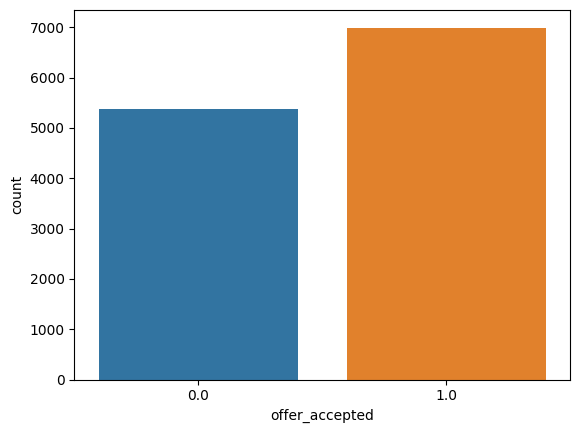

In [9]:
sns.countplot(x=cat_frame['offer_accepted'])

In [10]:
# plt.figure(figsize=(15,4))
# %matplotlib inline
# cat_frame.hist(bins=50,figsize=(20,15))
# plt.show()

In [11]:
df[cat]=cat_frame[cat]

In [12]:
# %matplotlib inline
# df.hist(bins=50,figsize=(20,15))
# plt.show()

## Numerical Transform

In [13]:
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

In [14]:
num_frame=pd.DataFrame(data=numeric_transformer.fit_transform(df), columns=df.columns)

In [15]:
num_frame

,offer_expiration(hrs),income_range,shaadi,restaurant_type,age,western/chinese,gender,restuarant_same_direction_house,cooks_regularly,customer_type,...,is_foodie,industry,children,visit_restaurant_with_rating_(avg),temperature,travel_time,climate,drop_location,prefer_home_food,offer_accepted
0,1.0,1.000000,0.25,0.25,0.529412,0.0,0.0,0.0,1.0,0.000000,...,0.0,1.000000,0.0,1.00,0.55102,1.000000,0.0,0.5,0.0,0.0
1,1.0,0.928566,0.25,1.00,1.000000,0.0,0.0,1.0,1.0,0.000000,...,0.0,1.000000,1.0,0.75,1.00000,0.733333,0.5,0.5,0.0,1.0
2,1.0,0.928566,0.50,0.50,0.235294,1.0,0.0,1.0,0.0,0.000000,...,1.0,0.041667,1.0,1.00,0.55102,0.000000,1.0,0.0,1.0,1.0
3,0.0,0.357137,0.50,1.00,0.823529,1.0,1.0,1.0,0.0,0.000000,...,1.0,0.875000,1.0,0.75,1.00000,0.000000,0.5,1.0,0.0,0.0
4,1.0,1.000000,0.50,0.25,0.088235,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.875000,0.0,0.75,0.00000,0.000000,0.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,0.0,0.214280,0.75,0.75,1.000000,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.875000,1.0,0.25,1.00000,1.000000,0.5,0.5,0.0,1.0
12375,1.0,0.214280,0.50,1.00,0.088235,0.0,1.0,0.0,0.0,0.666667,...,1.0,0.708333,1.0,0.50,0.55102,0.733333,0.5,0.5,0.0,1.0
12376,0.0,0.928566,0.25,0.50,0.382353,0.0,0.0,0.0,1.0,0.000000,...,1.0,0.625000,0.0,0.50,1.00000,0.733333,0.0,0.5,1.0,0.0
12377,0.0,0.071423,0.25,0.00,0.235294,0.0,1.0,0.0,1.0,0.000000,...,0.0,0.916667,0.0,0.25,1.00000,0.000000,0.5,1.0,0.0,1.0


In [16]:
# %matplotlib inline
# num_frame.hist(bins=50,figsize=(20,15))
# plt.show()

# Defining Features and Test - Train split

In [17]:
features=df.columns[:-1]
target=df.columns[-1]

In [18]:
X=num_frame[features]
y=num_frame[target]

<AxesSubplot: xlabel='offer_accepted', ylabel='count'>

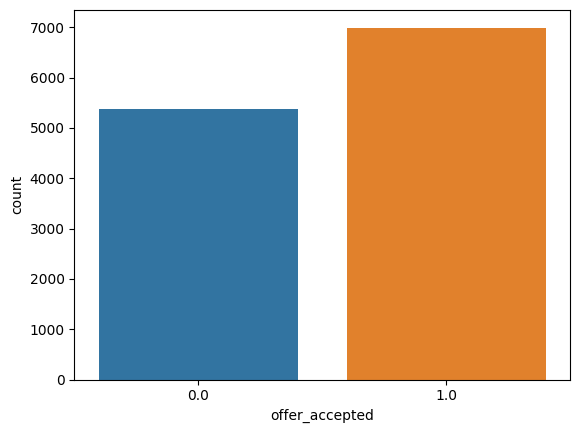

In [19]:
sns.countplot(x=num_frame[target])

In [20]:
# for i in range(1,43):
#     X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.33, random_state=28)
#     clf = LogisticRegressionCV(cv=15, 
#                            random_state=i
#                           ).fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     cm=confusion_matrix(y_test, y_pred)
#     accuracy=(cm[0][0]+cm[1][1])/y_test.shape[0]
#     print(i,"\t",accuracy)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, 
    test_size=0.33, 
    # random_state=12
    random_state=28
)

### DataSet After Split

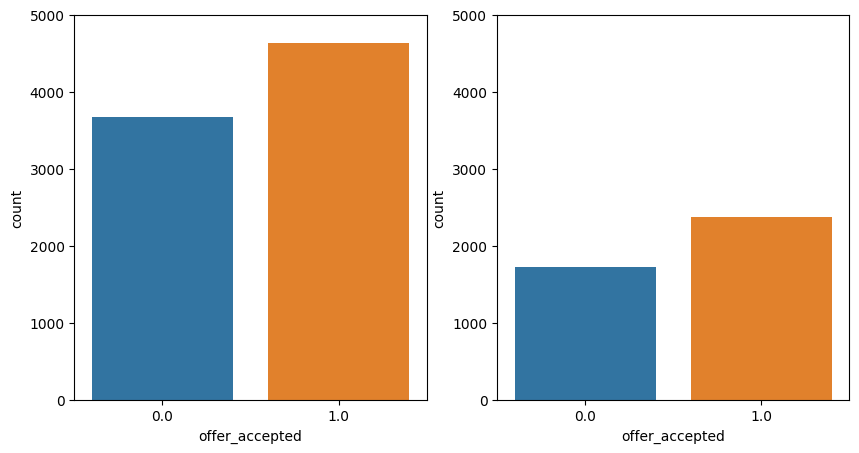

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.countplot(x=y_train,ax=ax[0])
sns.countplot(x=y_test,ax=ax[1])
ax[0].set_ylim(0, 5000)
ax[1].set_ylim(0, 5000)    
fig.show()

# Declear Model and Apply

## Logistic Regression

In [23]:
# clf = LogisticRegression(random_state=0).fit(X_train,y_train)
# clf = LogisticRegressionCV(cv=15, 
#                            random_state=42
#                           ).fit(X_train,y_train)

## Random Forest

In [24]:
# clf = RandomForestClassifier().fit(X_train,y_train)

## SVM 

In [25]:
clf = SVC().fit(X_train, y_train)

## Apply Model

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_pred = pd.Series(y_pred, dtype=np.float64, name='offers_accept_predicted')
y_pred.shape

(4086,)

In [28]:
y_test.shape

(4086,)

# Test Overerfit or UnderFit

In [29]:
y_train_test=clf.predict(X_train)

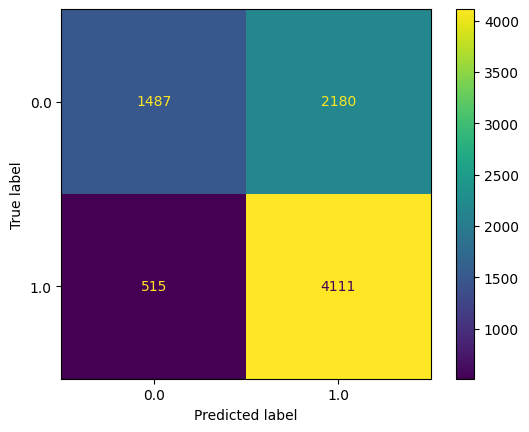

In [30]:
cm=confusion_matrix(y_train,y_train_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_test),
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [31]:
print(classification_report(y_train,y_train_test))

              precision    recall  f1-score   support

         0.0       0.74      0.41      0.52      3667
         1.0       0.65      0.89      0.75      4626

    accuracy                           0.68      8293
   macro avg       0.70      0.65      0.64      8293
weighted avg       0.69      0.68      0.65      8293



# Evaluation Metrices

In [32]:
# y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.30      0.38      1718
         1.0       0.61      0.80      0.69      2368

    accuracy                           0.59      4086
   macro avg       0.57      0.55      0.54      4086
weighted avg       0.57      0.59      0.56      4086



In [33]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 521, 1197],
       [ 476, 1892]])

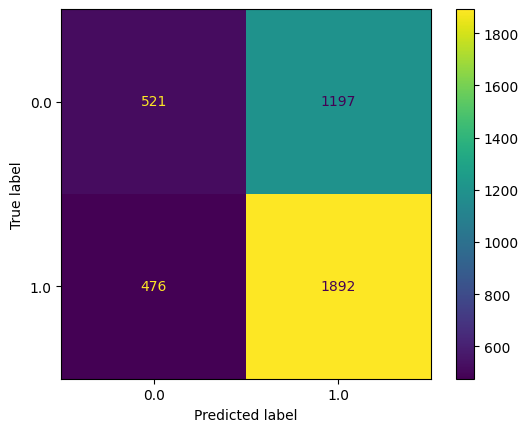

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=clf.classes_)
disp.plot()
plt.show()

## Score and Comaparision Plot

In [35]:
accuracy=(cm[0][0]+cm[1][1])/y_test.shape[0]
accuracy

0.5905531081742535

In [36]:
f1_score(y_test, y_pred)

0.6934212937511454

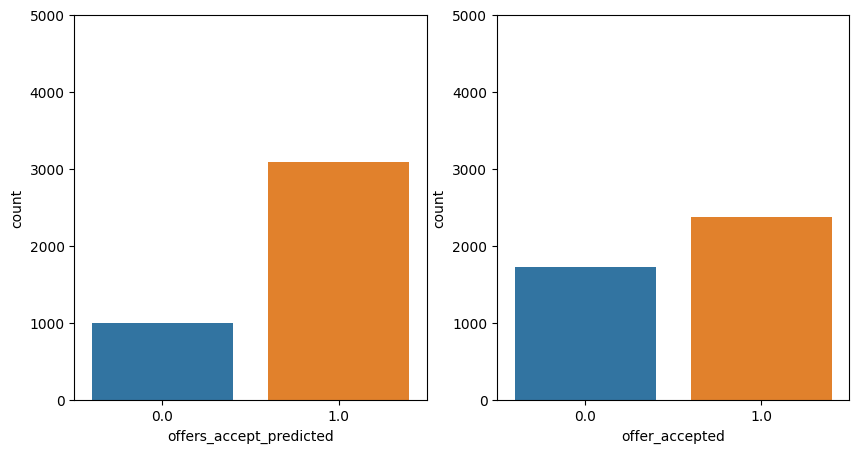

In [37]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.countplot(x=y_pred,ax=ax[0])
sns.countplot(x=y_test,ax=ax[1])
ax[0].set_ylim(0, 5000)
ax[1].set_ylim(0, 5000)    
fig.show()

In [38]:
print(y_test.value_counts())
print(y_pred.value_counts())

1.0    2368
0.0    1718
Name: offer_accepted, dtype: int64
1.0    3089
0.0     997
Name: offers_accept_predicted, dtype: int64


# Plot

In [39]:
# fig, ax = plt.subplots(10,2,figsize=(20, 20))
# sns.set_style('darkgrid')
# sns.countplot(data=df,x='offer_expiration(hrs)',hue="offer_accepted", ax=ax[0,0])
# sns.countplot(data=df,x='income_range',hue="offer_accepted", ax=ax[0,1])
# sns.countplot(data=df,x='shaadi',hue="offer_accepted", ax=ax[1,0])
# sns.countplot(data=df,x='restaurant_type',hue="offer_accepted", ax=ax[1,1])
# sns.countplot(data=df,x='age',hue="offer_accepted", ax=ax[2,0])
# sns.countplot(data=df,x='western/chinese',hue="offer_accepted", ax=ax[2,1])
# sns.countplot(data=df,x='gender',hue="offer_accepted", ax=ax[3,0])
# sns.countplot(data=df,x='restuarant_same_direction_house',hue="offer_accepted", ax=ax[3,1])
# sns.countplot(data=df,x='cooks_regularly',hue="offer_accepted", ax=ax[4,0])
# sns.countplot(data=df,x='customer_type',hue="offer_accepted", ax=ax[4,1])
# sns.countplot(data=df,x='education',hue="offer_accepted", ax=ax[5,0])
# sns.countplot(data=df,x='is_foodie',hue="offer_accepted", ax=ax[5,1])
# sns.countplot(data=df,x='industry',hue="offer_accepted", ax=ax[6,0])
# sns.countplot(data=df,x='children',hue="offer_accepted", ax=ax[6,1])
# sns.countplot(data=df,x='visit_restaurant_with_rating_(avg)',hue="offer_accepted", ax=ax[7,0])
# sns.countplot(data=df,x='temperature',hue="offer_accepted", ax=ax[7,1])
# sns.countplot(data=df,x='travel_time',hue="offer_accepted", ax=ax[8,0])
# sns.countplot(data=df,x='climate',hue="offer_accepted", ax=ax[8,1])
# sns.countplot(data=df,x='drop_location',hue="offer_accepted", ax=ax[9,0])
# sns.countplot(data=df,x='prefer_home_food',hue="offer_accepted", ax=ax[9,1])
# # sns.countplot(data=df,x='offer_accepted',hue="offer_accepted", ax=ax[20])
# fig.show()

# Creating Submission

In [40]:
df_test=pd.read_csv('test1.csv')
cat_test=df_test.select_dtypes(include=np.object_).columns.tolist()
# categorical_transformer.fit_transform(df_test[cat_test])
cat_test_frame=pd.DataFrame(data=categorical_transformer.fit_transform(df[cat_test]), columns=df[cat_test].columns)
df_test[cat_test]=cat_test_frame[cat_test]
# num_test=df_test.select_dtypes(include=np.number).columns.tolist()
num_test_frame=pd.DataFrame(data=numeric_transformer.fit_transform(df_test), columns=df_test.columns)
Test_X=num_test_frame
Test_X
# Test_y=num_test_frame[target]

,offer_expiration(hrs),income_range,shaadi,restaurant_type,age,western/chinese,gender,restuarant_same_direction_house,cooks_regularly,customer_type,education,is_foodie,industry,children,visit_restaurant_with_rating_(avg),temperature,travel_time,climate,drop_location,prefer_home_food
0,1.0,0.357137,0.25,0.25,1.000000,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,1.000000,1.0,1.00,1.00000,0.000000,0.0,0.5,0.0
1,0.0,0.214280,0.25,1.00,0.088235,1.0,0.0,0.0,0.0,0.000000,0.2,1.0,1.000000,1.0,0.00,0.55102,0.733333,0.5,0.5,1.0
2,1.0,1.000000,0.50,0.50,0.088235,1.0,0.0,0.0,1.0,0.000000,0.2,0.0,0.041667,0.0,1.00,0.55102,0.000000,1.0,0.0,0.0
3,1.0,0.214280,0.50,1.00,0.676471,0.0,1.0,0.0,0.0,0.000000,1.0,1.0,0.875000,1.0,0.00,0.00000,0.733333,0.5,1.0,1.0
4,0.0,0.071423,0.50,0.25,0.382353,1.0,0.0,1.0,0.0,0.000000,1.0,1.0,0.875000,0.0,0.00,1.00000,0.733333,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,1.0,0.214280,0.25,0.50,0.235294,0.0,0.0,1.0,0.0,0.333333,0.0,0.0,1.000000,0.0,0.25,0.55102,0.733333,0.0,1.0,0.0
5301,0.0,0.642851,0.50,0.50,0.235294,0.0,1.0,1.0,1.0,1.000000,0.2,1.0,0.666667,0.0,0.75,1.00000,0.733333,0.5,0.0,1.0
5302,0.0,0.499994,0.25,0.75,0.529412,0.0,1.0,0.0,1.0,0.666667,0.2,1.0,1.000000,1.0,0.50,0.55102,0.000000,1.0,0.0,1.0
5303,1.0,0.499994,0.50,0.25,0.529412,1.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.875000,1.0,0.75,1.00000,0.000000,0.5,1.0,0.0


In [41]:
y_sample_pred = clf.predict(Test_X)

In [42]:
result=[]
for x in y_sample_pred:
    if(x==1):
        result.append('Yes')
    else:
        result.append('No')

In [43]:
submission=pd.DataFrame(columns=['id','Offer Accepted'])
submission['id']=[i for i in range(len(y_sample_pred))]
submission['Offer Accepted']=result

In [44]:
submission.head()

,id,Offer Accepted
0,0,No
1,1,No
2,2,No
3,3,No
4,4,Yes


<AxesSubplot: xlabel='Offer Accepted', ylabel='count'>

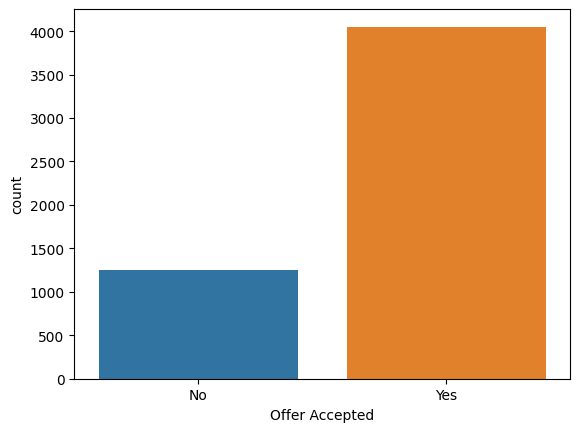

In [45]:
sns.countplot(x=submission['Offer Accepted'])

In [46]:
submission.to_csv('submission.csv',index=False)